#Przegląd

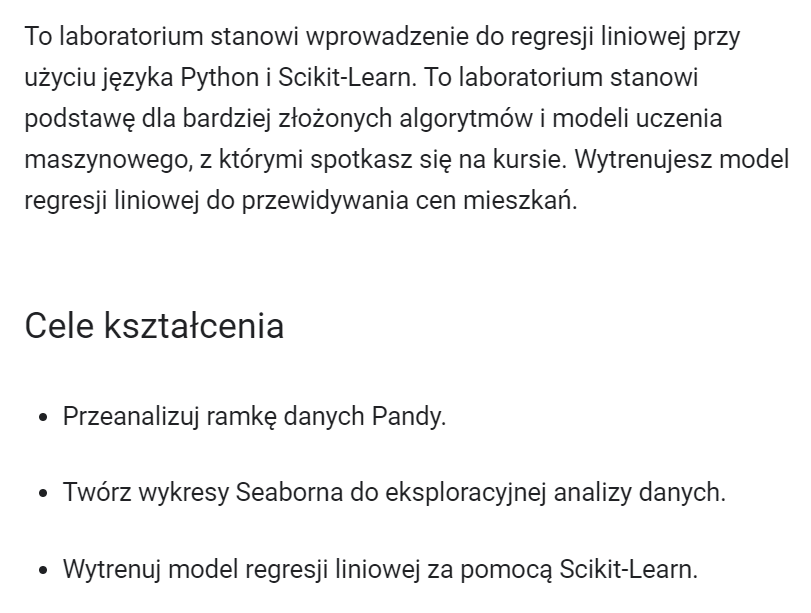

#Zadanie 1. Uruchom notesy Vertex AI

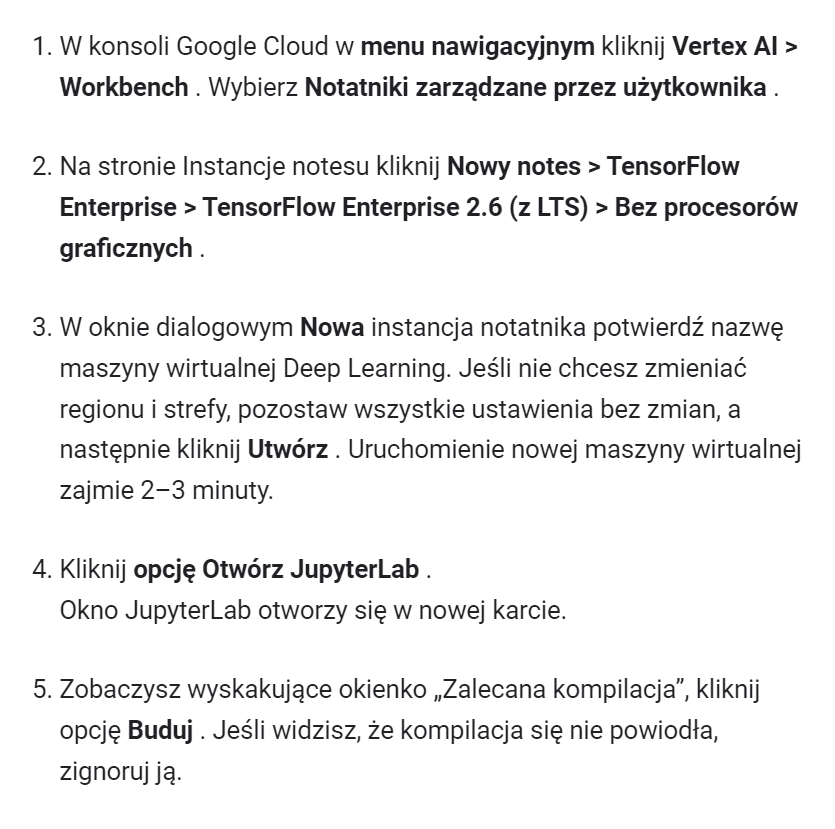

#Zadanie 2. Sklonuj repozytorium kursów w instancji Vertex AI Notebooks

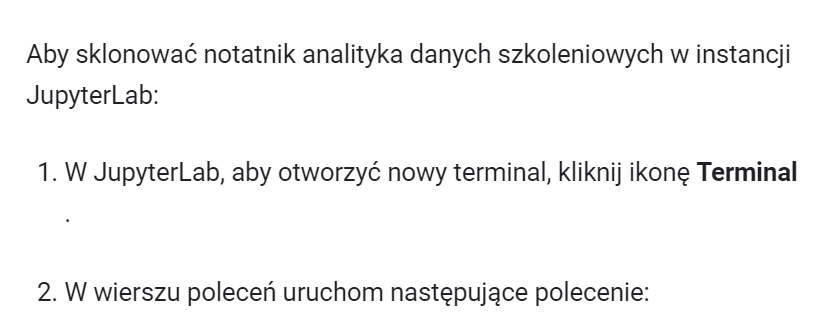

In [ ]:
git clone https://github.com/GoogleCloudPlatform/training-data-analyst

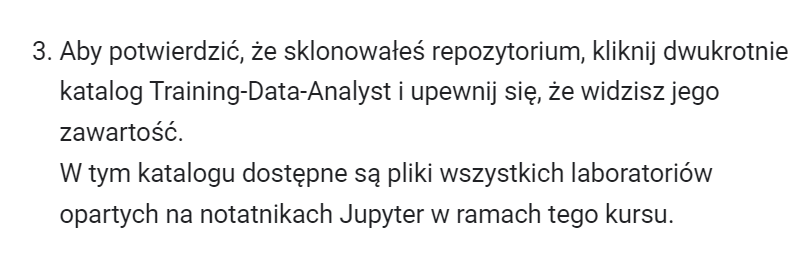

#Zadanie 3. Wprowadzenie do regresji liniowej


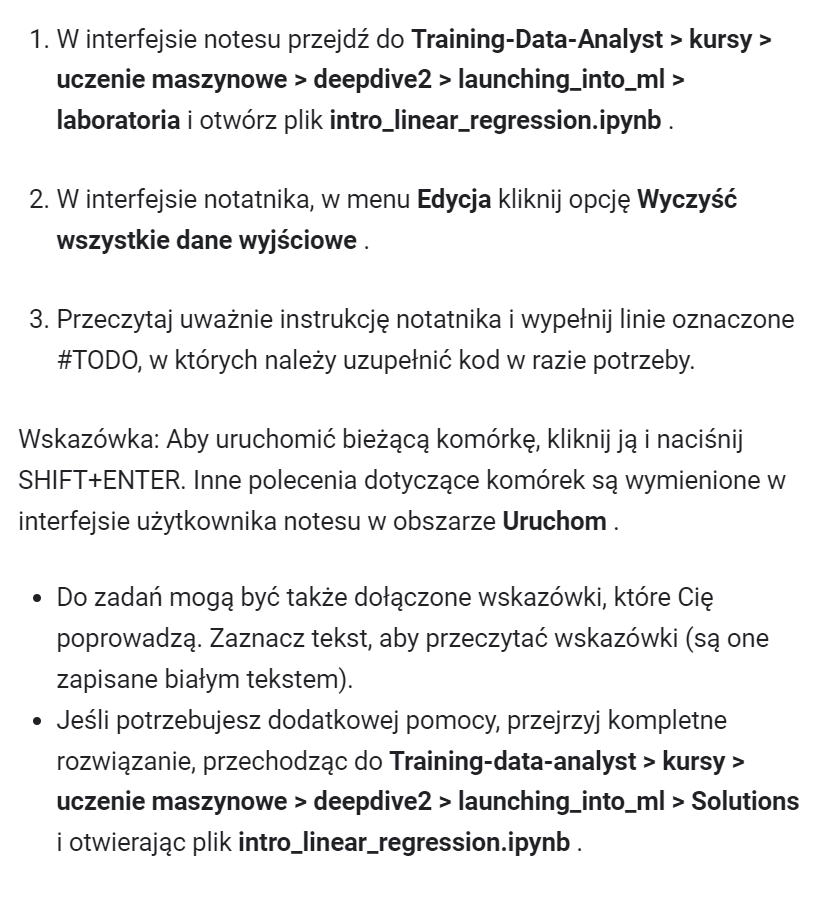

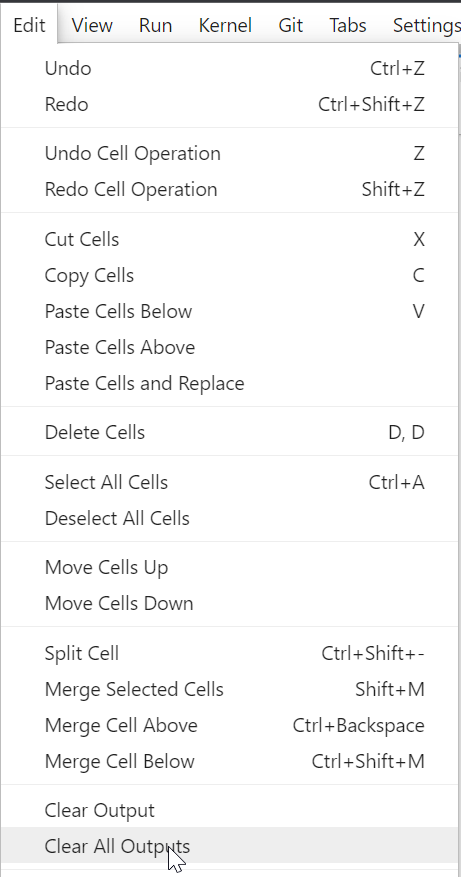

# Introduction to Linear Regression



## Learning objectives

1. Przeanalizuj ramkę danych Pandy.
2. Utwórz wykresy Seaborna do eksploracyjnej analizy danych.
3. Wytrenuj model regresji liniowej za pomocą Scikit-Learn.

## Introduction
To laboratorium stanowi wprowadzenie do regresji liniowej przy użyciu języka Python i Scikit-Learn. To laboratorium stanowi podstawę dla bardziej złożonych algorytmów i modeli uczenia maszynowego, z którymi spotkasz się na kursie. Wytrenujesz model regresji liniowej do przewidywania cen mieszkań.

Each learning objective will correspond to a __#TODO__ in the [student lab notebook](../labs/intro_linear_regression.ipynb) -- try to complete that notebook first before reviewing this solution notebook.

### Import Libraries

In [ ]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib.
%matplotlib inline

###  Load the Dataset

You will use the [USA housing prices](https://www.kaggle.com/kanths028/usa-housing) dataset found on Kaggle.  The data contains the following columns:

* 'Avg. Area Income': śr. Dochody mieszkańców domu miejskiego znajdują się w.
* 'Avg. Area House Age': średni wiek domów w tym samym mieście
* 'Avg. Area Number of Rooms': Średnia liczba pokoi dla domów w tym samym mieście
* 'Avg. Area Number of Bedrooms': średnia liczba sypialni dla domów w tym samym mieście
* 'Area Population': populacja domu miejskiego znajduje się w
* 'Price': cena, po której sprzedano dom
* 'Address': Adres domu

In [ ]:
# Next, you read the dataset into a Pandas dataframe.
df_USAhousing = pd.read_csv('../USA_Housing_toy.csv')

In [ ]:
# Next, you read the dataset into a Pandas dataframe.
df_USAhousing = pd.read_csv('/content/008 Path USA_Housing_toy.csv')

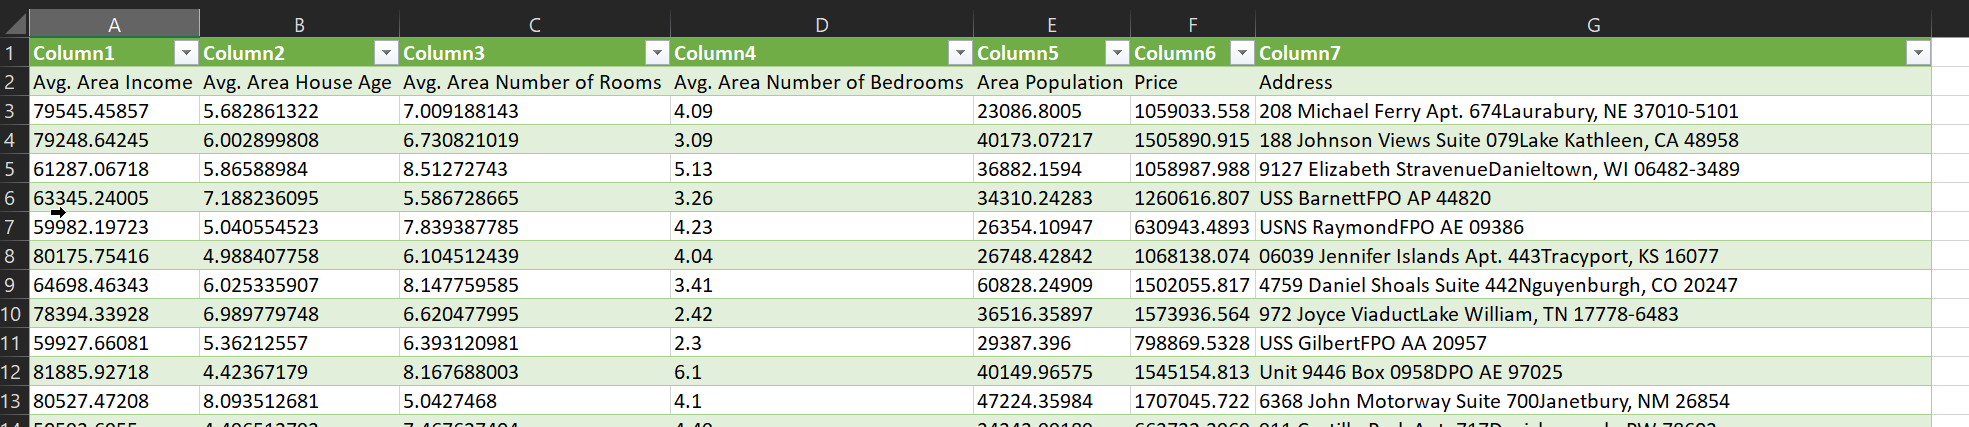

In [ ]:
# Show the first five row.

df_USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


Let's check for any null values.

In [ ]:
# The isnull() method is used to check and manage NULL values in a data frame.
df_USAhousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
# Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.
df_USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,68593.117818,5.980941,7.005079,3.989816,36032.881352,1.233117e+06
std,10696.969146,1.007664,1.002411,1.241848,9803.908974,3.547254e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,3.114052e+04
25%,61461.357480,5.328918,6.311252,3.150000,29381.948903,9.937032e+05
50%,68709.189825,5.981525,7.024682,4.050000,36073.859200,1.235056e+06
75%,75868.888025,6.680616,7.687694,4.500000,42683.564510,1.467923e+06
max,107701.748400,8.991399,10.759588,6.500000,69592.040240,2.469066e+06


In [ ]:
# Pandas info() function is used to get a concise summary of the dataframe.
df_USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              2500 non-null   float64
 1   Avg. Area House Age           2500 non-null   float64
 2   Avg. Area Number of Rooms     2500 non-null   float64
 3   Avg. Area Number of Bedrooms  2500 non-null   float64
 4   Area Population               2500 non-null   float64
 5   Price                         2500 non-null   float64
 6   Address                       2500 non-null   object 
dtypes: float64(6), object(1)
memory usage: 136.8+ KB


Let's take a peek at the first and last five rows of the data for all columns.

In [ ]:
print(df_USAhousing,5) # TODO 1

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
2495       70213.64600             5.913557                   5.829801   
2496       48640.10361             3.664294                   8.609398   
2497       64534.46591             3.883364                   7.382973   
2498       58337.23049             5.233592                   5.683635   
2499       78845.76218             6.200076                   5.645544   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09      23

## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

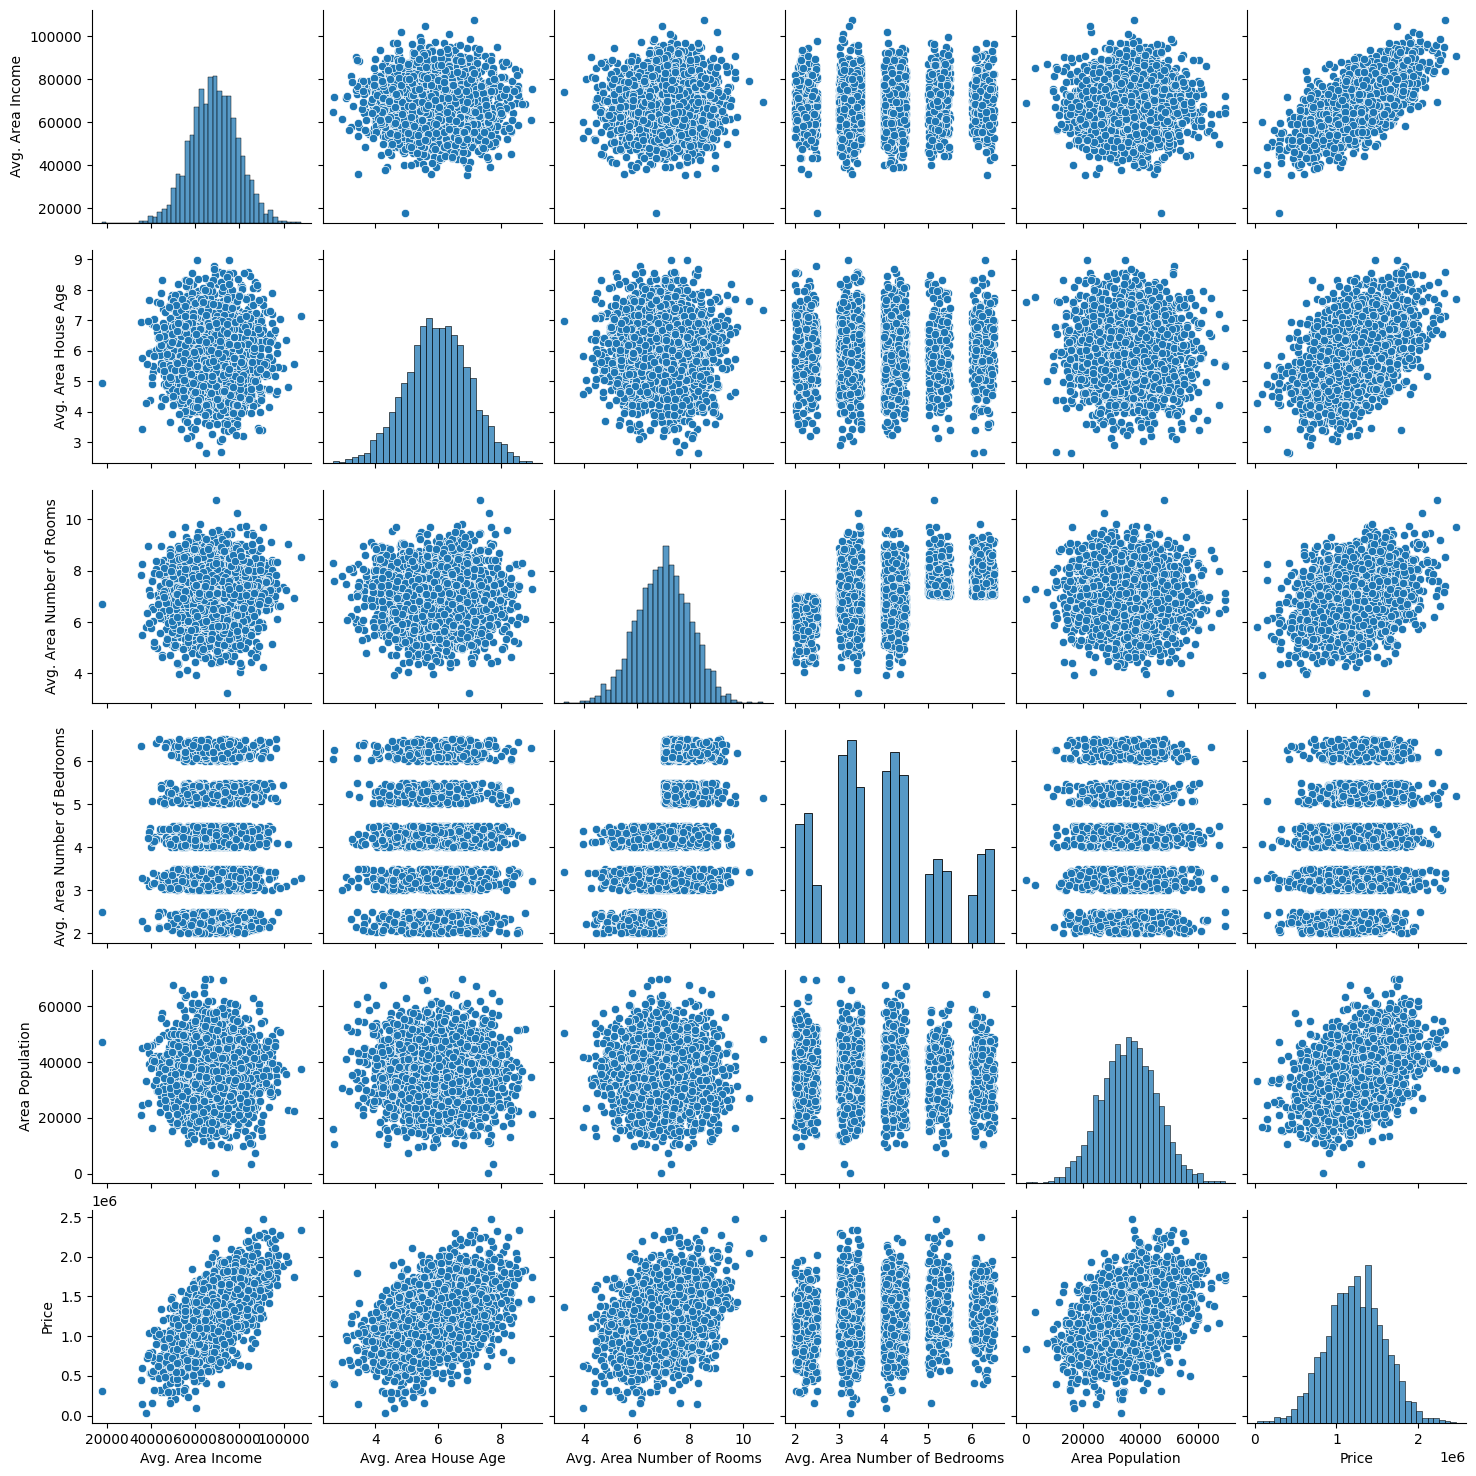

In [ ]:
# Wykreśl relacje parami w zbiorze danych. Domyślnie ta funkcja utworzy siatkę osi, w której będzie znajdować się każda zmienna numeryczna w danych
# wspólne dla osi Y w jednym wierszu i osi X w jednej kolumnie.
sns.pairplot(df_USAhousing)

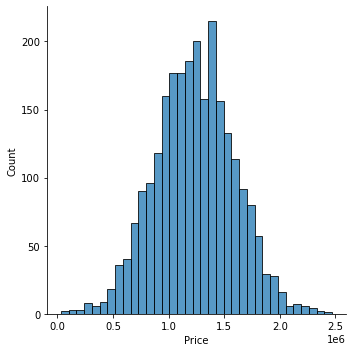

In [ ]:
# Stosowany jest zasadniczo do jednowariantowego zbioru obserwacji i wizualizuje go za pomocą histogramu, tj. tylko jednej obserwacji
# i dlatego wybierasz jedną konkretną kolumnę zbioru danych.
sns.displot(df_USAhousing['Price'])

<AxesSubplot:>

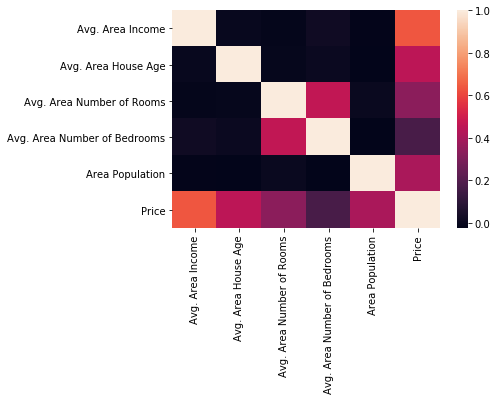

In [ ]:
# Mapa cieplna to sposób reprezentowania danych w formie dwuwymiarowej. Wartości danych są reprezentowane na wykresie w postaci kolorów.
# Celem mapy cieplnej jest zapewnienie kolorowego wizualnego podsumowania informacji.
sns.heatmap(df_USAhousing.corr()) # TODO 2

## Training a Linear Regression Model

Regresja to nadzorowany proces uczenia maszynowego. Jest to podobne do klasyfikacji, ale zamiast przewidywać etykietę, próbujesz przewidzieć wartość ciągłą. Regresja liniowa definiuje związek pomiędzy zmienną docelową (y) a zbiorem cech predykcyjnych (x). Krótko mówiąc: jeśli chcesz przewidzieć liczbę, użyj regresji.

Zacznijmy teraz trenować Twój model regresji! Najpierw musisz podzielić dane na tablicę X zawierającą funkcje do trenowania oraz tablicę y ze zmienną docelową, w tym przypadku kolumną Cena. Wyrzucisz kolumnę Adres, ponieważ zawiera ona tylko informacje tekstowe, których nie można wykorzystać w modelu regresji liniowej.

### X and y arrays

Następnie zdefiniujmy funkcje i etykietę. Krótko mówiąc, funkcja jest wprowadzana; etykieta jest wyprowadzana. Dotyczy to zarówno problemów klasyfikacji, jak i regresji.

In [ ]:
# Funkcje / Zbiór cech predykcyjnych
X = df_USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

# Zmienna docelowa
y = df_USAhousing['Price']

## Train - Test - Split

Podzielmy teraz dane na zbiór uczący i testowy. Będziesz trenował model na zestawie treningowym, a następnie użyjesz zestawu testowego do oceny modelu. Pamiętaj, że do testów wykorzystujesz 40% danych.

#### What is Random State?
Jeśli w kodzie nie jest określona liczba całkowita dla stanu losowego, to przy każdym wykonaniu kodu generowana jest nowa wartość losowa, a zbiory danych treningowych i testowych będą za każdym razem miały inne wartości. Jeśli jednak zostanie przypisana stała wartość - np. `random_state = 0, 1, 101` lub dowolna inna liczba całkowita, to niezależnie od tego, ile razy wykonasz swój kod, wynik będzie taki sam, np. te same wartości będą znajdować się w zbiorach danych treningowych i testowych. Zatem podany stan losowy jest używany jako zarodek generatora liczb losowych. Dzięki temu liczby losowe są generowane w tej samej kolejności.

In [ ]:
# Zaimportuj funkcję train_test_split ze sklearn.model_selection
from sklearn.model_selection import train_test_split

# Podziel dane na zbiór treningowy (60%) i testowy (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [ ]:
# Import LinearRegression function from sklearn.model_selection
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression dopasowuje model liniowy ze współczynnikami w = (w1, …, wp), aby zminimalizować resztkową sumę kwadratów między obserwowanymi celami
# w zbiorze danych oraz cele przewidywane przez przybliżenie liniowe.
lm = LinearRegression()

In [ ]:
# Trenowanie modelu regresji liniowej
lm.fit(X_train, y_train) # TODO 3

LinearRegression()

## Model Evaluation

Oceńmy model, sprawdzając jego współczynniki i możliwości ich interpretacji.

In [ ]:
# print the intercept
print(lm.intercept_)

-2609837.641456213


Tutaj możemy zobaczyć wartość każdej z wag odpowiadających każdej z różnych cech

In [ ]:
# Pandas DataFrame to dwuwymiarowa, potencjalnie heterogeniczna tabelaryczna struktura danych o zmiennym rozmiarze, z oznaczonymi osiami (wiersze i kolumny).
# Coefficient / Współczynnik

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.631226
Avg. Area House Age,164685.174384
Avg. Area Number of Rooms,116858.596405
Avg. Area Number of Bedrooms,2119.114963
Area Population,15.111985



Poniżej wyjaśniono, w jaki sposób możemy interpretować tego rodzaju wagę

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.



- Przy utrzymaniu wszystkich innych funkcji na stałym poziomie, wzrost o 1 jednostkę w **Śr. Dochód obszarowy** wiąże się z **wzrostem o \$21,52**.
- Przy utrzymaniu wszystkich innych funkcji na stałym poziomie, wzrost o 1 jednostkę w **Śr. Powierzchnia Wiek domu** wiąże się z **wzrostem o \$164883,28**.
- Przy utrzymaniu wszystkich innych funkcji na stałym poziomie, wzrost o 1 jednostkę w **Śr. Powierzchnia Liczba pokoi** wiąże się z **wzrostem o \$122368,67**.
- Przy utrzymaniu wszystkich innych funkcji na stałym poziomie, wzrost o 1 jednostkę w **Śr. Powierzchnia Liczba sypialni** wiąże się z **wzrostem o \$2233,80**.
- Przy niezmienionych wszystkich innych funkcjach, wzrost **Populacji obszaru** o 1 jednostkę jest powiązany z **wzrostem o \$15,15**.

## Predictions from your Model

Pobierzmy predykcję z zestawu testowego i zobaczmy, jak dobrze sobie poradziły!

Wydaje się, że jest to super skorelowane, więc wydaje się, że nasz model nie działa dobrze.

In [ ]:
# Przewiduj wartości w oparciu o obiekt modelu liniowego.
predictions = lm.predict(X_test)

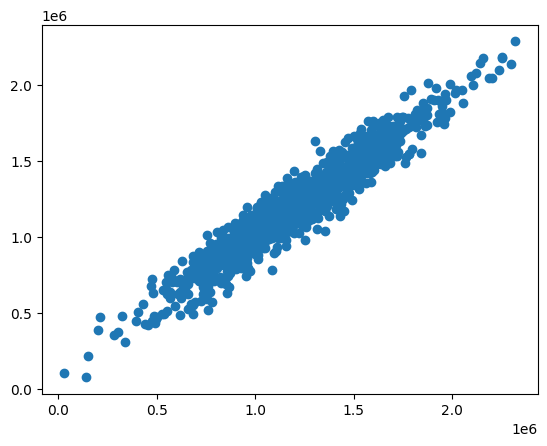

In [ ]:
# Wykresy punktowe są szeroko stosowane do przedstawiania relacji między zmiennymi i wpływu zmiany jednej na drugą.
plt.scatter(y_test,predictions)

**Residual Histogram**

Używam histogramu do sprawdzania, czy wariancja reszt ma rozkład normalny. Ponieważ jeśli histogram nie ma rozkładu normalnego, sugeruje to, że modele nie działają prawidłowo. Zatem reszty, jeśli nasz model działa prawidłowo, muszą mieć rozkład normalny.

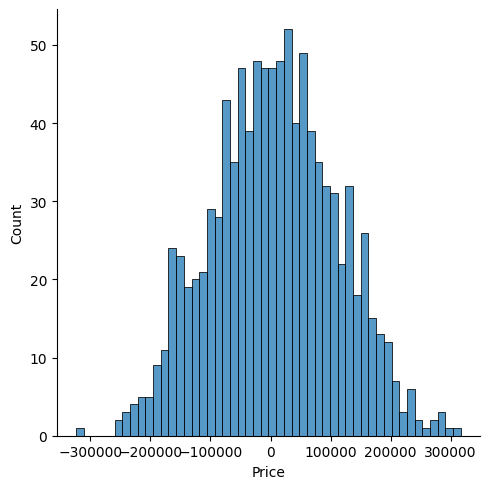

In [ ]:
# Stosowany jest zasadniczo do jednowariantowego zbioru obserwacji i wizualizuje go za pomocą histogramu, tj. tylko jednej obserwacji
# i dlatego wybierasz jedną konkretną kolumnę zbioru danych.
sns.displot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) mierzy średnią odległość między prognozami, a rzeczywistymi wartościami.


$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) mierzy średnią kwadratową odległość między prognozami, a rzeczywistymi wartościami.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) jest pierwiastkiem z MSE. Jest bardziej odporna na wartości odstające niż MAE lub MSE.


$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** jest najłatwiejsze do zrozumienia, ponieważ jest to średni błąd.
- **MSE** jest bardziej popularne niż MAE, ponieważ MSE „karze” większe błędy, co zwykle jest przydatne w realnym świecie.
- **RMSE** jest jeszcze bardziej popularne niż MSE, ponieważ RMSE można interpretować w jednostkach „y”.

Wszystko to są **funkcje straty**, ponieważ chcesz je zminimalizować.

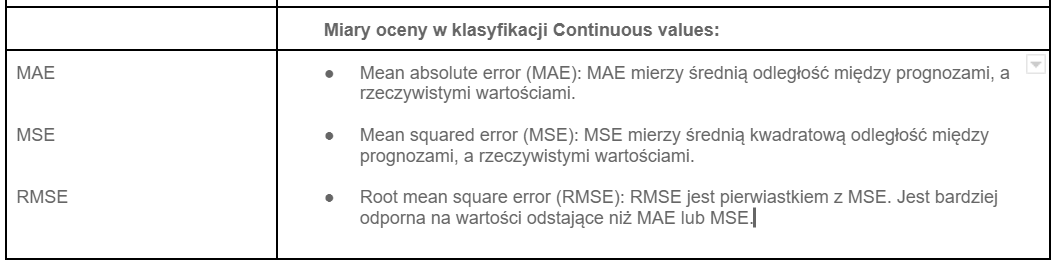

In [ ]:
# Importing metrics from sklearn
from sklearn import metrics

In [ ]:
# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 84590.3252528809
MSE: 10939833271.005766
RMSE: 104593.65789093412


Copyright 2021 Google Inc.  Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.